In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('social_media_dataset_simulated.csv')

# Tampilkan 5 baris pertama
df.head()


,post_id,date,platform,content_type,caption_length,likes,comments,shares,reach,engagement_rate
0,1,2025-06-13 00:00:00,Instagram,Image,160,1446,278,117,33098,0.056
1,2,2025-02-27 00:00:00,Instagram,Image,299,791,58,32,12395,0.071
2,3,2025-06-01 00:00:00,Twitter,Image,35,202,36,14,13280,0.019
3,4,2025-02-25 00:00:00,Instagram,Image,121,6992,371,684,94850,0.085
4,5,2025-06-16 00:00:00,Twitter,Video,249,6643,543,283,78236,0.095


Total number of posts for 6 months

In [3]:
print(f"Total post: {len(df)}")


Total post: 200


📊 Platform paling banyak digunakan

platform
Twitter      106
Instagram     94
Name: count, dtype: int64


/tmp/ipython-input-4-4147783678.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='platform', palette='pastel')


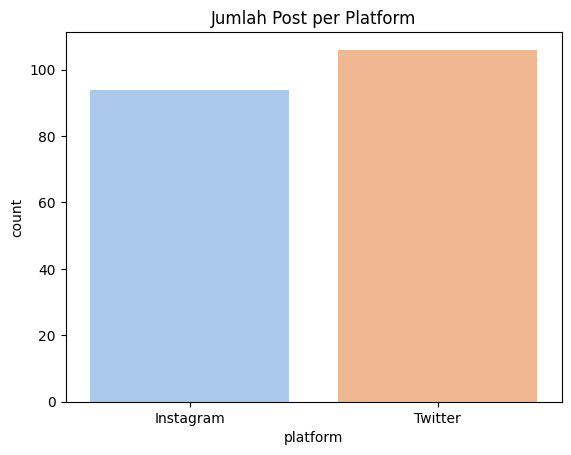

In [4]:
platform_counts = df['platform'].value_counts()
print(platform_counts)

# Visualisasi
sns.countplot(data=df, x='platform', palette='pastel')
plt.title('Jumlah Post per Platform')
plt.show()


Distribution of content types

content_type
Video       57
Image       53
Carousel    47
Text        43
Name: count, dtype: int64


/tmp/ipython-input-5-3928453155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='content_type', palette='Set2')


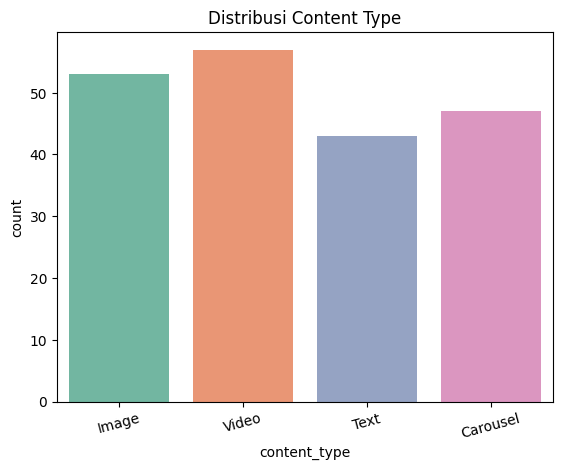

In [5]:
content_counts = df['content_type'].value_counts()
print(content_counts)

# Visualisasi
sns.countplot(data=df, x='content_type', palette='Set2')
plt.title('Distribusi Content Type')
plt.xticks(rotation=15)
plt.show()


Basic statistics (likes, comments, shares, reach, engagement rate)

In [6]:
df[['likes', 'comments', 'shares', 'reach', 'engagement_rate']].describe()


,likes,comments,shares,reach,engagement_rate
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2724.675000,346.955000,172.515000,50347.825000,0.066240
std,2094.357929,309.140749,149.998257,28522.151348,0.031775
min,91.000000,11.000000,4.000000,1150.000000,0.013000
25%,941.000000,103.750000,55.500000,25452.000000,0.037000
50%,2206.000000,256.000000,132.000000,54629.500000,0.068500
75%,4379.500000,522.750000,253.250000,74175.000000,0.095000
max,8514.000000,1527.000000,684.000000,99548.000000,0.127000


Average Engagement Rate per Platform

platform
Instagram    0.068564
Twitter      0.064179
Name: engagement_rate, dtype: float64


/tmp/ipython-input-7-3936819128.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engagement_by_platform.index, y=engagement_by_platform.values, palette='coolwarm')


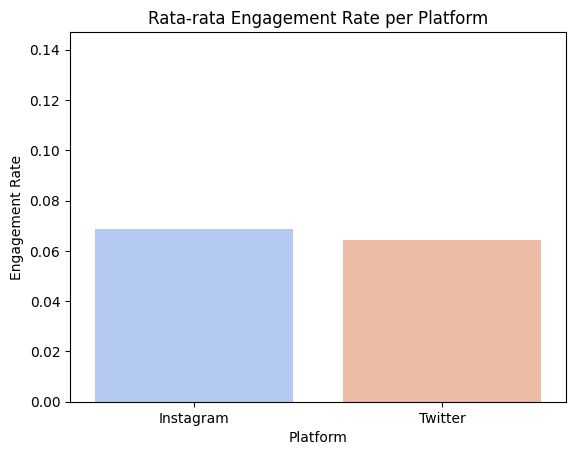

In [7]:
# Hitung rata-rata engagement rate per platform
engagement_by_platform = df.groupby('platform')['engagement_rate'].mean().sort_values(ascending=False)
print(engagement_by_platform)

# Visualisasi
sns.barplot(x=engagement_by_platform.index, y=engagement_by_platform.values, palette='coolwarm')
plt.title('Rata-rata Engagement Rate per Platform')
plt.ylabel('Engagement Rate')
plt.xlabel('Platform')
plt.ylim(0, df['engagement_rate'].max() + 0.02)
plt.show()


Average Reach per Platform

platform
Twitter      51854.679245
Instagram    48648.606383
Name: reach, dtype: float64


/tmp/ipython-input-8-4287654764.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reach_by_platform.index, y=reach_by_platform.values, palette='viridis')


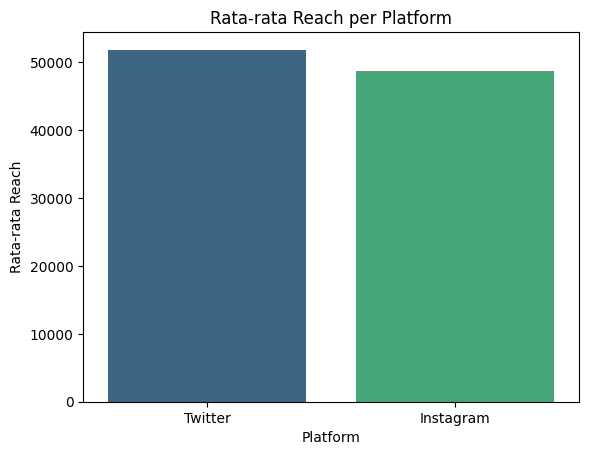

In [8]:
# Hitung rata-rata reach per platform
reach_by_platform = df.groupby('platform')['reach'].mean().sort_values(ascending=False)
print(reach_by_platform)

# Visualisasi
sns.barplot(x=reach_by_platform.index, y=reach_by_platform.values, palette='viridis')
plt.title('Rata-rata Reach per Platform')
plt.ylabel('Rata-rata Reach')
plt.xlabel('Platform')
plt.show()


Scatterplot Caption Length vs Engagement Rate

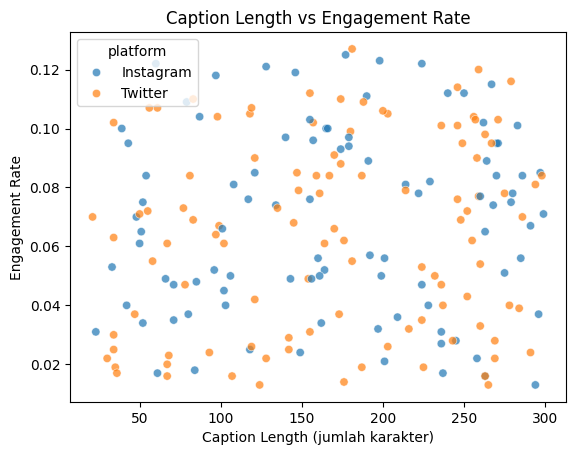

In [9]:
# Scatterplot
sns.scatterplot(data=df, x='caption_length', y='engagement_rate', hue='platform', alpha=0.7)
plt.title('Caption Length vs Engagement Rate')
plt.xlabel('Caption Length (jumlah karakter)')
plt.ylabel('Engagement Rate')
plt.show()


Create Caption Categories (Short, Medium, Long)

In [10]:
# Tambah kolom kategori panjang caption
def categorize_caption(length):
    if length < 80:
        return 'Pendek'
    elif length <= 160:
        return 'Sedang'
    else:
        return 'Panjang'

df['caption_category'] = df['caption_length'].apply(categorize_caption)

# Lihat distribusi kategori
df['caption_category'].value_counts()


,count
caption_category,
Panjang,111
Sedang,52
Pendek,37


Average Engagement Rate per Caption Category

caption_category
Panjang    0.069135
Sedang     0.066346
Pendek     0.057405
Name: engagement_rate, dtype: float64


/tmp/ipython-input-11-2615174609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=caption_stats.index, y=caption_stats.values, palette='muted')


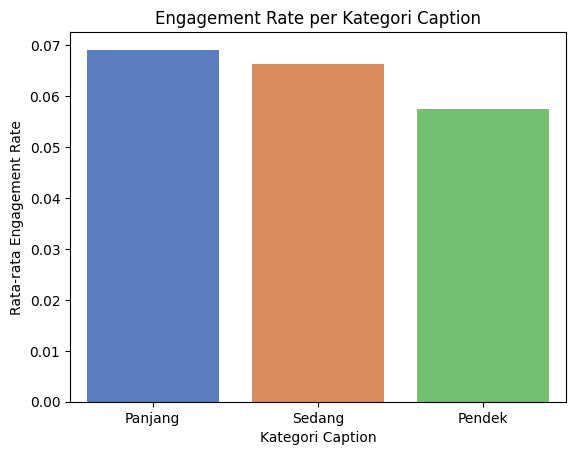

In [11]:
caption_stats = df.groupby('caption_category')['engagement_rate'].mean().sort_values(ascending=False)
print(caption_stats)

# Visualisasi
sns.barplot(x=caption_stats.index, y=caption_stats.values, palette='muted')
plt.title('Engagement Rate per Kategori Caption')
plt.ylabel('Rata-rata Engagement Rate')
plt.xlabel('Kategori Caption')
plt.show()


Average Engagement Rate per Content Type

content_type
Carousel    0.068957
Text        0.068744
Video       0.064333
Image       0.063849
Name: engagement_rate, dtype: float64


/tmp/ipython-input-12-3875102876.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_type_stats.index, y=content_type_stats.values, palette='pastel')


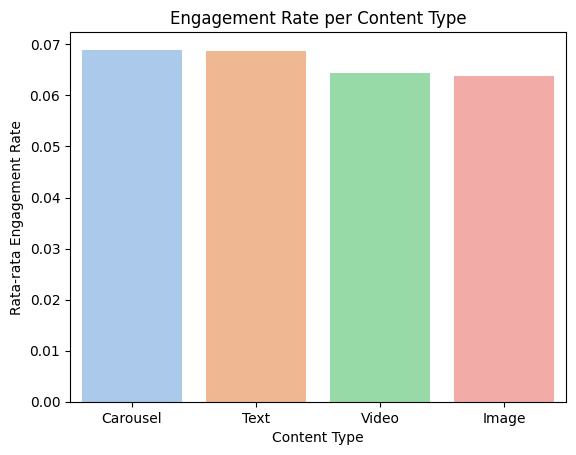

In [12]:
# Hitung rata-rata engagement per content type
content_type_stats = df.groupby('content_type')['engagement_rate'].mean().sort_values(ascending=False)
print(content_type_stats)

# Visualisasi
sns.barplot(x=content_type_stats.index, y=content_type_stats.values, palette='pastel')
plt.title('Engagement Rate per Content Type')
plt.ylabel('Rata-rata Engagement Rate')
plt.xlabel('Content Type')
plt.show()


In [13]:
# Lihat distribusi jumlah postingan per jenis konten
content_type_counts = df['content_type'].value_counts()

# Gabungkan dengan engagement rate
content_summary = pd.DataFrame({
    'avg_engagement': df.groupby('content_type')['engagement_rate'].mean(),
    'total_posts': content_type_counts
}).sort_values(by='avg_engagement', ascending=False)

print(content_summary)


              avg_engagement  total_posts
content_type                             
Carousel            0.068957           47
Text                0.068744           43
Video               0.064333           57
Image               0.063849           53


Engagement Trends per Month

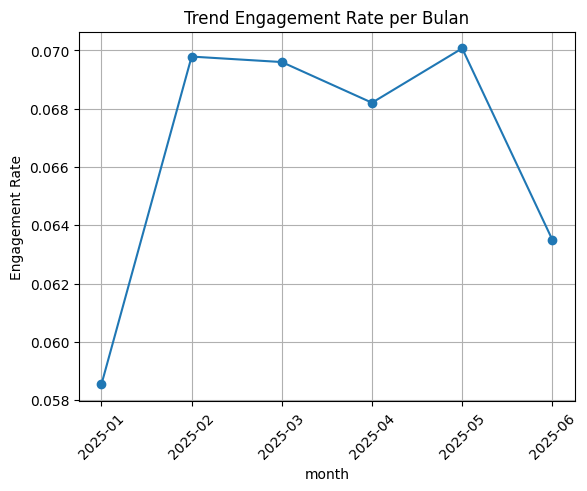

In [14]:
# Ubah kolom tanggal ke format datetime dan buat kolom bulan
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M').astype(str)

# Hitung rata-rata engagement per bulan
monthly_engagement = df.groupby('month')['engagement_rate'].mean()

# Visualisasi
monthly_engagement.plot(kind='line', marker='o', title='Trend Engagement Rate per Bulan')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Best Days to Post

/tmp/ipython-input-15-3461388449.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_engagement.index, y=daily_engagement.values, palette='Blues_d')


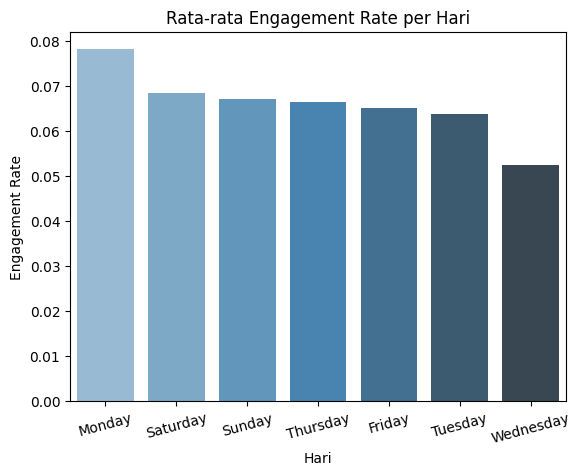

day_of_week
Monday       0.078179
Saturday     0.068462
Sunday       0.067167
Thursday     0.066500
Friday       0.065071
Tuesday      0.063926
Wednesday    0.052577
Name: engagement_rate, dtype: float64


In [15]:
# Buat kolom hari
df['day_of_week'] = df['date'].dt.day_name()

# Hitung rata-rata engagement per hari
daily_engagement = df.groupby('day_of_week')['engagement_rate'].mean().sort_values(ascending=False)

# Visualisasi
sns.barplot(x=daily_engagement.index, y=daily_engagement.values, palette='Blues_d')
plt.title('Rata-rata Engagement Rate per Hari')
plt.ylabel('Engagement Rate')
plt.xlabel('Hari')
plt.xticks(rotation=15)
plt.show()

# Tampilkan ranking hari
print(daily_engagement)
